Target classes: ['Light_Load' 'Maximum_Load' 'Medium_Load']
Accuracy: 0.9055
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3572
           1       0.82      0.83      0.83      1499
           2       0.84      0.83      0.84      1937

    accuracy                           0.91      7008
   macro avg       0.88      0.88      0.88      7008
weighted avg       0.91      0.91      0.91      7008


Confusion Matrix:
[[3501   12   59]
 [  20 1244  235]
 [  76  260 1601]]
Linear Regression R²: 0.5687
Linear Regression MSE: 0.3155
Random Forest R²: 0.8569
Random Forest MSE: 0.1047


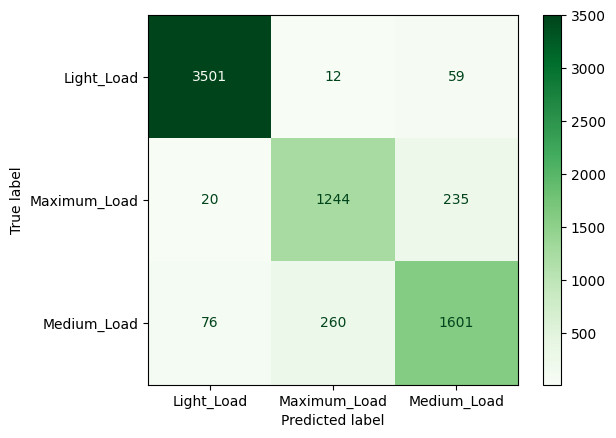

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Fetch dataset
steel_industry_energy_consumption = fetch_ucirepo(id=851)

# Data frames
X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets

# Convert y to a 1D array
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]  # Extract the first column as a Series

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['WeekStatus', 'Day_of_week'], drop_first=True)

# Scale continuous features
continuous_columns = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
                      'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
                      'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

scaler = StandardScaler()
X[continuous_columns] = scaler.fit_transform(X[continuous_columns])

# 3. Encode the target variable if categorical
if y.dtype == 'object' or isinstance(y.iloc[0], str):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    print("Target classes:", label_encoder.classes_)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForestClassifier for classification
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
cm_display.plot(cmap='Greens')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_regressor.predict(X_test)

# Evaluate Linear Regression model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"Linear Regression MSE: {mse_lr:.4f}")

# Train Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest R²: {r2_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")


Target classes: ['Light_Load' 'Maximum_Load' 'Medium_Load']
SVM Classification Accuracy: 0.8567
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3572
           1       0.77      0.73      0.75      1499
           2       0.74      0.78      0.76      1937

    accuracy                           0.86      7008
   macro avg       0.82      0.82      0.82      7008
weighted avg       0.86      0.86      0.86      7008


SVM Confusion Matrix:
[[3406   12  154]
 [  46 1089  364]
 [ 120  308 1509]]
Linear Regression R²: 0.5687
Linear Regression MSE: 0.3155
Random Forest R²: 0.8569
Random Forest MSE: 0.1047
SVM Regression R²: 0.7252
SVM Regression MSE: 0.2011


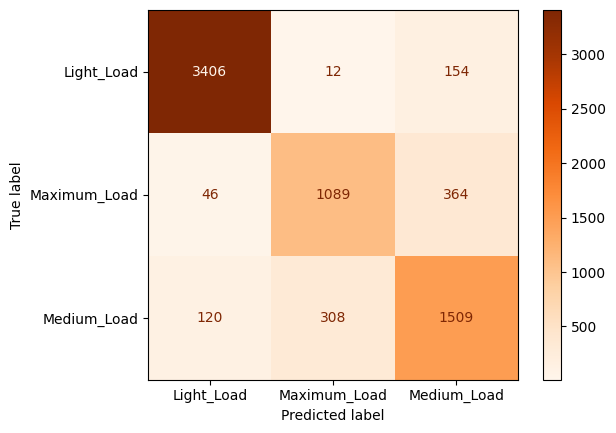

In [ ]:
# including svm for regression and classification tasks

from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, SVR

steel_industry_energy_consumption = fetch_ucirepo(id=851)

X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets

# Convert y to a 1D array
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['WeekStatus', 'Day_of_week'], drop_first=True)

# Scale
continuous_columns = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
                      'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
                      'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

scaler = StandardScaler()
X[continuous_columns] = scaler.fit_transform(X[continuous_columns])

# 3. Encode the target variable if categorical
if y.dtype == 'object' or isinstance(y.iloc[0], str):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    print("Target classes:", label_encoder.classes_)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification with SVM
svm_classifier = SVC(kernel='rbf', gamma=10, random_state=42)
svm_classifier.fit(X_train, y_train)

# Evaluate SVM classifier
y_pred_svm = svm_classifier.predict(X_test)
print(f"SVM Classification Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix:")
print(conf_matrix_svm)
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=label_encoder.classes_)
cm_display_svm.plot(cmap='Oranges')

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_regressor.predict(X_test)

# Evaluate
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"Linear Regression MSE: {mse_lr:.4f}")

# Train Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest R²: {r2_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

# Regression with SVM
svm_regressor = SVR(kernel='rbf', gamma=10)
svm_regressor.fit(X_train, y_train)

# Predict
y_pred_svm_reg = svm_regressor.predict(X_test)

# Evaluate
r2_svm = r2_score(y_test, y_pred_svm_reg)
mse_svm = mean_squared_error(y_test, y_pred_svm_reg)

print(f"SVM Regression R²: {r2_svm:.4f}")
print(f"SVM Regression MSE: {mse_svm:.4f}")
